In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import medfilt
# import scipy.fftpack as fft
from scipy.fftpack import fft, fftfreq, ifft
file_path = "sound_sample_voicenoised.wav"
y, sr = librosa.load(file_path, sr=None)

In [2]:
#perform STFT to audio signal, and get the audio magnitude & phase
S_full, phase = librosa.magphase(librosa.stft(y))

In [3]:
S_full.shape

(1025, 192)

In [4]:
#estimating noise power of the audio signal
noise_power = np.mean(S_full[:, :], axis=1)
noise_power

array([0.75947565, 0.5783003 , 0.29132995, ..., 0.01132739, 0.01341516,
       0.01142862], dtype=float32)

In [5]:
#create a mask to identify when signal magnitude exceeds the estimated noise power
#smooth the mask using a median filter to avoid abrupt changes.
mask = S_full > noise_power[:, None]
mask = mask.astype(float)
mask = medfilt(mask, kernel_size=(1, 5))
s_clean = S_full * mask

In [6]:
#inverse STFT to convert the cleaned magnitude data back to the time domain
y_clean = librosa.istft(s_clean * phase)

In [33]:
#save audio to wav format
# sf.write("stft_filtered_6.wav", y_clean, sr)

In [34]:
t = np.array(range(0, len(y))) / sr
len(t)


97879

In [38]:
print("Length of t:", len(t))
print("Length of y_clean.real:", len(y_clean.real))

Length of t: 97879
Length of y_clean.real: 97792


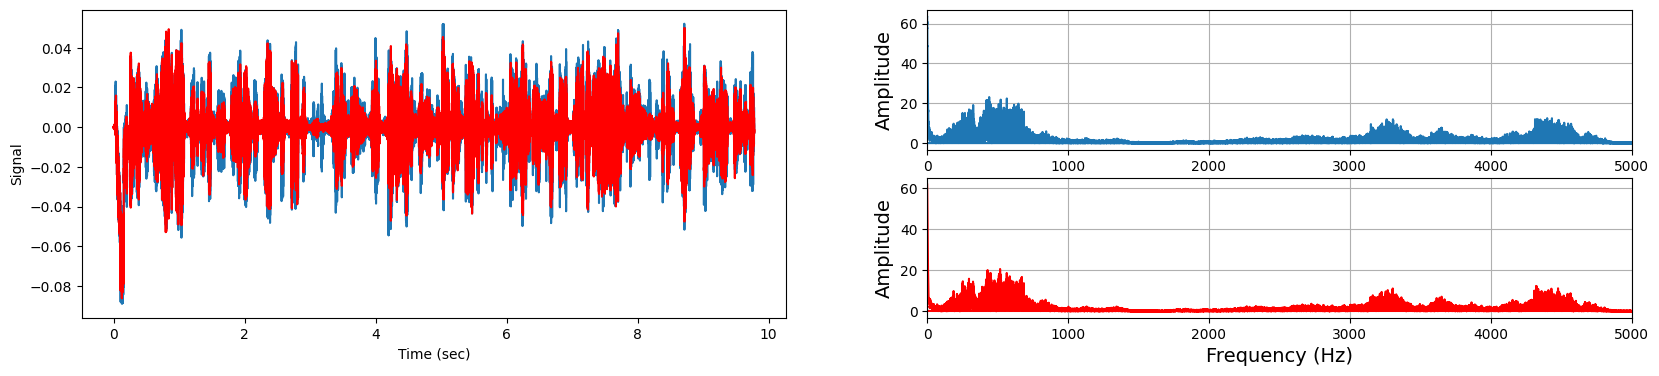

In [40]:
n = len(y)
yf = fft(y)
yf_clean = fft(y_clean)
# xf = np.linspace(0.0, sr / 2.0, n // 2)
F=fftfreq(n,1/sr)

fig = plt.figure(figsize=(20, 4))
gs=fig.add_gridspec(2,2)

ax1=fig.add_subplot(gs[:,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,1])

ax1.plot(t[:97792],y[:97792],label='Input')
ax1.plot(t[:97792],y_clean.real[:97792],label='output', color='r')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Signal')

# ax2.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
ax2.plot(F[:97792], np.absolute(yf)[:97792])
ax2.set_xlim(0, 5000)
ax2.set_xlabel('Frequency (Hz)',fontsize=14)
ax2.set_ylabel('Amplitude',fontsize=14)
ax2.grid()

ax3.plot(F[:97792], np.absolute(yf_clean)[:97792], color='r')
ax3.set_xlim(0, 5000)
ax3.set_xlabel('Frequency (Hz)',fontsize=14)
ax3.set_ylabel('Amplitude',fontsize=14)
ax3.grid()